In [1]:
import sys
sys.path.append("..")
from MPRA_predict.utils import *
from MPRA_predict.datasets import *
from MPRA_predict.metrics import *

In [18]:
subprocess.run(
    ['python', 'train_scripts/test_0504.py', 
     '-s', 'saved/0616_Gosai_MPRA_MyCNNTransformer_seq_epi_Agarwal_3_cell_types/0616_121916/', 
    #  '-c', 'configs/config_0616_Gosai_MPRA_MyCNNTransformer_seq_epi_Agarwal_3_cell_types.yaml',
     '-o', 'Agarwal_MPRA_pred.npy'],
    cwd='..'
)

use saved config: saved/0616_Gosai_MPRA_MyCNNTransformer_seq_epi_Agarwal_3_cell_types/0616_121916/config.yaml


100%|██████████| 14/14 [00:05<00:00,  2.45it/s]


CompletedProcess(args=['python', 'train_scripts/test_0504.py', '-s', 'saved/0616_Gosai_MPRA_MyCNNTransformer_seq_epi_Agarwal_3_cell_types/0616_121916/', '-o', 'Agarwal_MPRA_pred.npy'], returncode=0)

In [2]:
MPRA_df = pd.read_csv('../data/Agarwal_MPRA/Agarwal_MPRA_Sei_feature_norm_0616.csv')
MPRA_df

,seq,chr,HepG2,K562,WTC11,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,WTC11_DNase,WTC11_H3K4me3,WTC11_H3K27ac,WTC11_H3K27me3,WTC11_H3K4me1,WTC11_H3K36me3,WTC11_H3K9me3,WTC11_CTCF
0,AGGACCGGATCAACTGTAGGACCAGGCTCTGCCTCCTTCTCTCTCC...,chr1,1.114,0.352,0.143,-0.595,0.322,0.385,0.157,-0.135,0.580,1.024,-0.687,-0.750,0.193,-0.061,0.843,-0.727,0.996,NaN,-0.759,-0.469,0.455,0.796,-0.543,1.477,1.361,1.817,0
1,AGGACCGGATCAACTTGTACTTGCCTTAGGAGGTCAAACACATTAG...,chr10,-1.315,-1.246,-0.921,-1.422,-0.890,-1.064,0.840,-0.835,-0.555,-1.052,-0.881,-1.287,-0.984,-0.784,0.934,-0.525,-0.300,NaN,-0.875,-0.954,-0.107,-0.323,0.317,0.490,-0.010,0.547,0
2,AGGACCGGATCAACTTAGCTCAACACAAATCCATCACTGAAAGCAG...,chr10,0.166,0.490,1.133,0.944,-0.620,-1.048,-1.053,-0.323,0.362,-0.435,1.651,0.886,0.005,-0.258,-1.309,-0.565,0.177,NaN,1.663,1.599,0.497,-0.282,-0.225,-0.610,-0.331,-0.670,0
3,AGGACCGGATCAACTGACCCTAAATCAGTATGGGGAAAGGTCCCCA...,chr10,1.404,1.826,-0.095,-0.241,-0.035,0.368,0.004,0.715,-0.528,-0.435,-0.632,-0.026,0.054,0.543,-0.011,0.263,-0.299,NaN,-0.645,0.425,0.775,2.106,0.336,1.861,0.035,-0.639,0
4,AGGACCGGATCAACTGTGATCTCAGCTTACTGCAACCTCTGCCTCC...,chr10,-0.809,-0.573,-0.071,-1.349,-2.566,-2.448,-3.607,-2.743,-2.162,-0.196,0.384,-1.941,-3.134,-2.587,-2.899,-3.812,-2.024,NaN,0.349,-1.180,-2.871,-3.586,-2.570,-4.442,-1.583,-1.566,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56970,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCAGAAGGGCCAG...,chrnan,-1.363,-1.159,-1.086,-1.439,-0.628,-0.526,-0.123,-1.188,-0.849,-0.686,-0.956,-1.710,-0.861,-0.721,0.588,-1.395,-0.455,NaN,-1.069,-1.406,-0.632,-0.906,-0.377,-1.242,-0.156,0.094,0
56971,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCAGAAGGGCCAG...,chrnan,-0.535,-1.177,-1.045,-0.991,-0.398,-0.377,-0.456,-0.684,-1.303,-1.345,-1.093,-1.021,-0.416,-0.376,-0.426,0.109,-1.677,NaN,-1.110,-1.456,-1.295,-1.434,-1.257,-1.573,-1.407,-0.654,0
56972,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCATGTTTGCTTT...,chrnan,-0.906,-0.474,-0.519,-1.157,-0.647,-0.448,-1.157,-0.672,-1.085,-1.309,-0.818,1.691,0.535,1.175,-0.889,1.586,-1.650,NaN,-0.264,-0.798,-0.520,-0.998,0.619,-0.086,-0.929,-2.336,0
56973,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCAGAAGGGCCAG...,chrnan,-1.416,-0.960,-1.016,-1.915,-1.518,-1.399,-0.784,-1.937,-1.782,-1.266,-1.177,-1.719,-1.340,-0.951,-0.103,-1.091,-1.599,NaN,-1.183,-1.587,-1.312,-1.228,-1.148,-1.582,-1.315,-0.838,0


In [3]:
cell_types = ['K562', 'HepG2', 'WTC11']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

In [4]:
data_split_dict = {}
data_split_dict['total'] = np.ones(len(MPRA_df), dtype=bool)

data_split_dict['chrom'] = MPRA_df['chr'].isin([f'chr{i}' for i in (list(range(1, 23)) + ['X', 'Y'])])
data_split_dict['not_chrom'] = ~data_split_dict['chrom']

data_split_dict['train'] = MPRA_df['chr'].isin([f'chr{i}' for i in (list(range(3, 23)) + ['X', 'Y'])])
data_split_dict['valid'] = MPRA_df['chr'].isin(['chr1'])
data_split_dict['test'] = MPRA_df['chr'].isin(['chr2'])

In [5]:
for data_split in ['test']:
    pearson_df = pd.DataFrame()
    for cell_type in cell_types:
        for cell_type_2 in cell_types:
            condition = data_split_dict[data_split]
            df = MPRA_df[condition]
            x = df[f'{cell_type}']
            y = df[f'{cell_type_2}']
            r, p = pearson(x, y)
            pearson_df.loc[f'{cell_type}', f'{cell_type_2}'] = r
    print(data_split)
    print(pearson_df)


for data_split in ['test']:
    pearson_df = pd.DataFrame()
    for cell_type in cell_types:
        for cell_type_2 in cell_types:
            condition = data_split_dict[data_split]
            df = MPRA_df[condition]
            x = df[f'{cell_type}']
            y = df[f'{cell_type_2}_DNase']
            r, p = pearson(x, y)
            pearson_df.loc[f'{cell_type}', f'{cell_type_2}_DNase'] = r
    print(data_split)
    print(pearson_df)

test
       K562  HepG2  WTC11
K562  1.000  0.539  0.547
HepG2 0.539  1.000  0.422
WTC11 0.547  0.422  1.000
test
       K562_DNase  HepG2_DNase  WTC11_DNase
K562        0.459        0.101        0.203
HepG2       0.213        0.339        0.126
WTC11       0.339        0.269        0.471


In [6]:
y_pred = np.load(f'../saved/0609_Gosai_MPRA_MyResTransformer_seq_3_cell_types/0609_025440/Agarwal_MPRA_pred.npy')
cols = [f'{cell_type}_pred' for cell_type in cell_types]
MPRA_df[cols] = y_pred

In [1]:
for data_split in ['test']:
    pearson_df = pd.DataFrame()
    for cell_type in cell_types:
        for cell_type_2 in cell_types:
            condition = data_split_dict[data_split]
            df = MPRA_df[condition]
            x = df[f'{cell_type}']
            y = df[f'{cell_type_2}_pred']
            r, p = pearson(x, y)
            pearson_df.loc[f'{cell_type}', f'{cell_type_2}_pred'] = r
    print('seq-based model, trained on Gosai MPRA')
    print(data_split)
    print(pearson_df)

####### should be worst, but not

NameError: name 'pd' is not defined

In [8]:
y_pred = np.load(f'../saved/0612_Gosai_MPRA_MyResTransformer_seq_epi_3_cell_types/0611_230252/Agarwal_MPRA_pred.npy')
cols = [f'{cell_type}_pred' for cell_type in cell_types]
MPRA_df[cols] = y_pred

In [9]:
for data_split in ['test']:
    pearson_df = pd.DataFrame()
    for cell_type in cell_types:
        for cell_type_2 in cell_types:
            condition = data_split_dict[data_split]
            df = MPRA_df[condition]
            x = df[f'{cell_type}']
            y = df[f'{cell_type_2}_pred']
            r, p = pearson(x, y)
            pearson_df.loc[f'{cell_type}', f'{cell_type_2}_pred'] = r
    print('seq-epi-based model trained on Gosai MPRA')
    print(data_split)
    print(pearson_df)

seq-epi-based model trained on Gosai MPRA
test
       K562_pred  HepG2_pred  WTC11_pred
K562       0.654       0.565       0.567
HepG2      0.492       0.548       0.482
WTC11      0.550       0.558       0.603


In [10]:
# y_pred = np.load(f'../saved/0616_Gosai_MPRA_MyCNNTransformer_seq_Agarwal/0616_054640/Agarwal_MPRA_pred.npy').squeeze()
# y_pred
# cols = [f'{cell_type}_pred' for cell_type in cell_types]
# MPRA_df[cols] = y_pred

In [11]:
# for data_split in ['test']:
#     pearson_df = pd.DataFrame()
#     for cell_type in cell_types:
#         for cell_type_2 in cell_types:
#             condition = data_split_dict[data_split]
#             df = MPRA_df[condition]
#             x = df[f'{cell_type}']
#             y = df[f'{cell_type_2}_pred']
#             r, p = pearson(x, y)
#             pearson_df.loc[f'{cell_type}', f'{cell_type_2}_pred'] = r
#     print('train on Agarwal seq-based model')
#     print(data_split)
#     print(pearson_df)

In [16]:
y_pred = np.load(f'../saved/0616_Gosai_MPRA_MyCNNTransformer_seq_epi_Agarwal/0616_035340/Agarwal_MPRA_pred.npy')
cols = [f'{cell_type}_pred' for cell_type in cell_types]
MPRA_df[cols] = y_pred

In [17]:
for data_split in ['test']:
    pearson_df = pd.DataFrame()
    for cell_type in cell_types:
        for cell_type_2 in cell_types:
            condition = data_split_dict[data_split]
            df = MPRA_df[condition]
            x = df[f'{cell_type}']
            y = df[f'{cell_type_2}_pred']
            r, p = pearson(x, y)
            pearson_df.loc[f'{cell_type}', f'{cell_type_2}_pred'] = r
    print('seq-epi-based model trained on Agarwal K562')
    print(data_split)
    print(pearson_df)

seq-epi-based model trained on Agarwal K562
test
       K562_pred  HepG2_pred  WTC11_pred
K562       0.755       0.660       0.684
HepG2      0.450       0.550       0.442
WTC11      0.500       0.530       0.587


In [14]:
y_pred = np.load(f'../saved/0616_Gosai_MPRA_MyCNNTransformer_seq_epi_Agarwal_3_cell_types/0616_121916/Agarwal_MPRA_pred.npy')
cols = [f'{cell_type}_pred' for cell_type in cell_types]
MPRA_df[cols] = y_pred

In [15]:
for data_split in ['test']:
    pearson_df = pd.DataFrame()
    for cell_type in cell_types:
        for cell_type_2 in cell_types:
            condition = data_split_dict[data_split]
            df = MPRA_df[condition]
            x = df[f'{cell_type}']
            y = df[f'{cell_type_2}_pred']
            r, p = pearson(x, y)
            pearson_df.loc[f'{cell_type}', f'{cell_type_2}_pred'] = r
    print('seq-epi-based model trained on Agarwal 3 cell types')
    print(data_split)
    print(pearson_df)

seq-epi-based model trained on Agarwal 3 cell types
test
       K562_pred  HepG2_pred  WTC11_pred
K562       0.721       0.505       0.554
HepG2      0.507       0.657       0.432
WTC11      0.512       0.488       0.710


In [ ]:
       K562_DNase  HepG2_DNase  WTC11_DNase
K562        0.459        0.101        0.203
HepG2       0.213        0.339        0.126
WTC11       0.339        0.269        0.471



seq-epi-based model trained on Gosai MPRA
       K562_pred  HepG2_pred  WTC11_pred
K562       0.654       0.565       0.567
HepG2      0.492       0.548       0.482
WTC11      0.550       0.558       0.603


K562_pred  HepG2_pred  WTC11_pred
K562       0.721       0.505       0.554
HepG2      0.507       0.657       0.432
WTC11      0.512       0.488       0.710

0.754923143154048


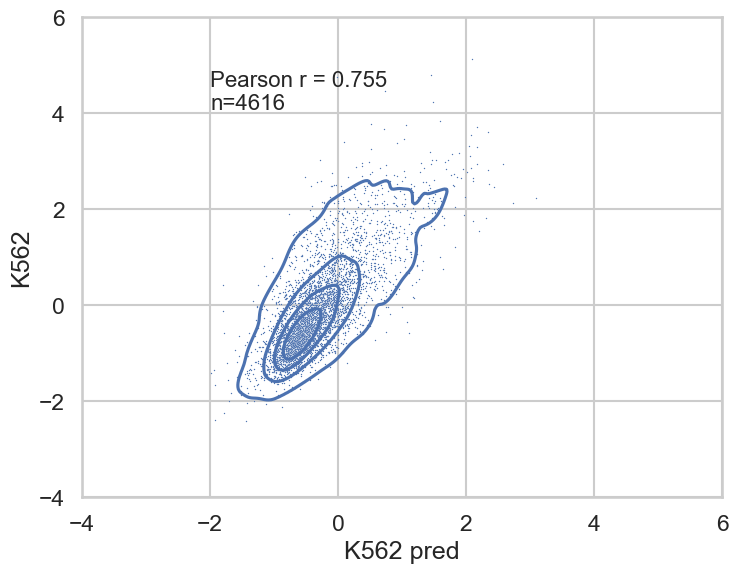

In [20]:
plt.figure(figsize=(8,6), dpi=100)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)

df = MPRA_df[data_split_dict['test']]
x = df['K562_pred']
y = df['K562']
sns.scatterplot(x=x, y=y, s=1)
sns.kdeplot(x=x, y=y, n_levels=5)
r, _ = pearson(x, y)
print(r)
plt.text(-2, 4, f'Pearson r = {r:.3f}\nn={len(x)}', fontsize=16, ha='left', va='bottom')
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.xlabel('K562 pred')
plt.ylabel('K562')
plt.savefig('figures/Agarwal_MPRA_K562_pred.png', dpi=400)

0.5503711253360187


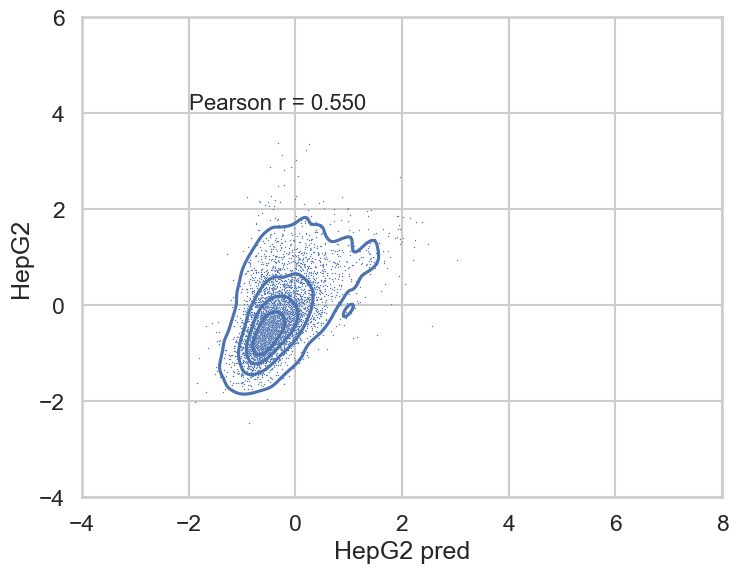

In [10]:
plt.figure(figsize=(8,6), dpi=100)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)

df = MPRA_df[data_split_dict['test']]
x = df['HepG2_pred']
y = df['HepG2']
sns.scatterplot(x=x, y=y, s=1)
sns.kdeplot(x=x, y=y, n_levels=5)
r, _ = pearson(x, y)
print(r)
plt.text(-2, 4, f'Pearson r = {r:.3f}', fontsize=16, ha='left', va='bottom')
plt.xlim(-4, 8)
plt.ylim(-4, 6)
plt.xlabel('HepG2 pred')
plt.ylabel('HepG2')
plt.savefig('figures/Agarwal_MPRA_HepG2_pred.png', dpi=400)

0.5871725625614944


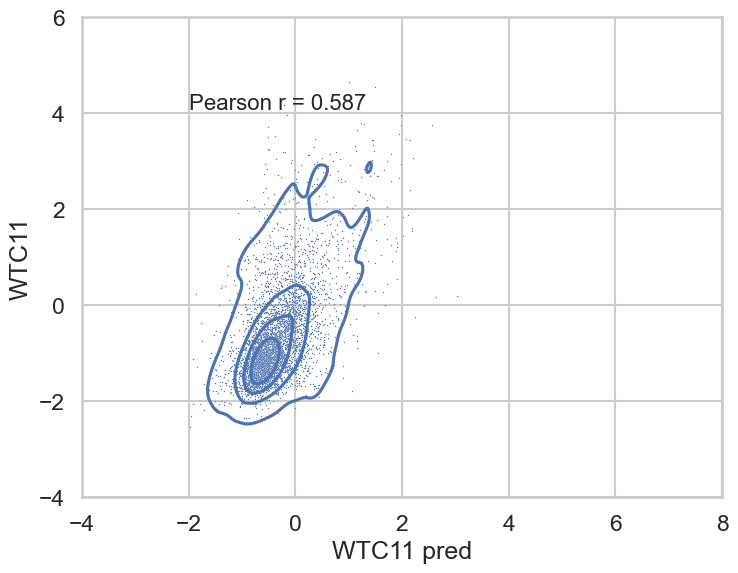

In [11]:
plt.figure(figsize=(8,6), dpi=100)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)

df = MPRA_df[data_split_dict['test']]
x = df['WTC11_pred']
y = df['WTC11']
sns.scatterplot(x=x, y=y, s=1)
sns.kdeplot(x=x, y=y, n_levels=5)
r, _ = pearson(x, y)
print(r)
plt.text(-2, 4, f'Pearson r = {r:.3f}', fontsize=16, ha='left', va='bottom')
plt.xlim(-4, 8)
plt.ylim(-4, 6)
plt.xlabel('WTC11 pred')
plt.ylabel('WTC11')
plt.savefig('figures/Agarwal_MPRA_WTC11_pred.png', dpi=400)

0.7098621749945357


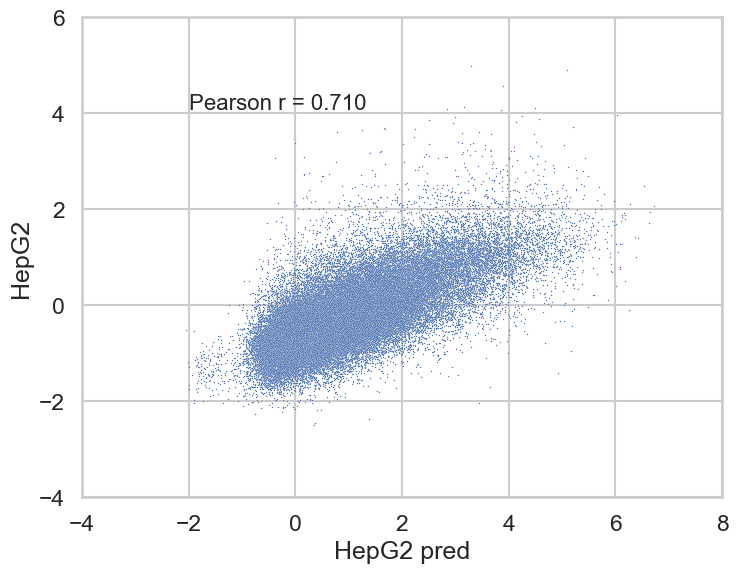

In [14]:
# plt.figure(figsize=(8,6), dpi=100)
# plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)

# x = MPRA_df['HepG2_pred']
# y = MPRA_df['HepG2']
# sns.scatterplot(x=x, y=y, s=1)
# r, _ = pearson(x, y)
# print(r)
# plt.text(-2, 4, f'Pearson r = {r:.3f}', fontsize=16, ha='left', va='bottom')
# plt.xlim(-4, 8)
# plt.ylim(-4, 6)
# plt.xlabel('HepG2 pred')
# plt.ylabel('HepG2')

# plt.savefig('figures/Agarwal_MPRA_HepG2_pred.png', dpi=400)

0.6199585979278094


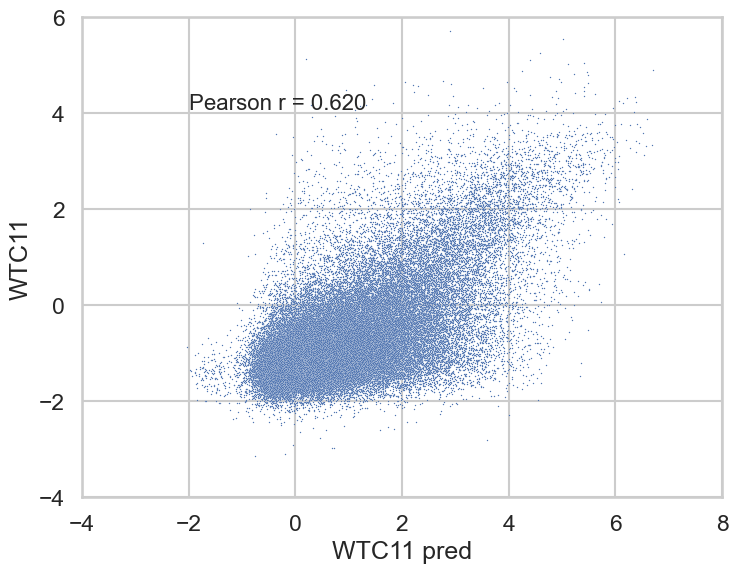

In [15]:
plt.figure(figsize=(8,6), dpi=100)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)

x = MPRA_df['WTC11_pred']
y = MPRA_df['WTC11']
sns.scatterplot(x=x, y=y, s=1)
r, _ = pearson(x, y)
print(r)
plt.text(-2, 4, f'Pearson r = {r:.3f}', fontsize=16, ha='left', va='bottom')
plt.xlim(-4, 8)
plt.ylim(-4, 6)
plt.xlabel('WTC11 pred')
plt.ylabel('WTC11')

plt.savefig('figures/Agarwal_MPRA_WTC11_pred.png', dpi=400)